In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = 'dataset_.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (1338, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,3,18.000000,64.000000,No issue
sex,object,0.000000,0,,,No issue
bmi,float64,0.000000,NA,15.960000,53.130000,Column has 9 outliers greater than upper bound (47.32) or lower than lower bound(13.67). Cap them or remove them.
children,int64,0.000000,0,0.000000,5.000000,No issue
smoker,object,0.000000,0,,,No issue
region,object,0.000000,0,,,No issue
medical charges,float64,0.000000,100,1121.873900,63770.428010,Target column


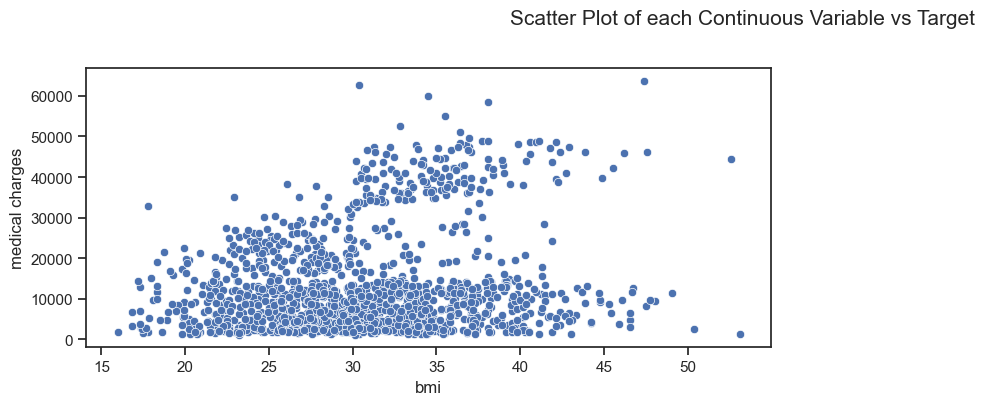

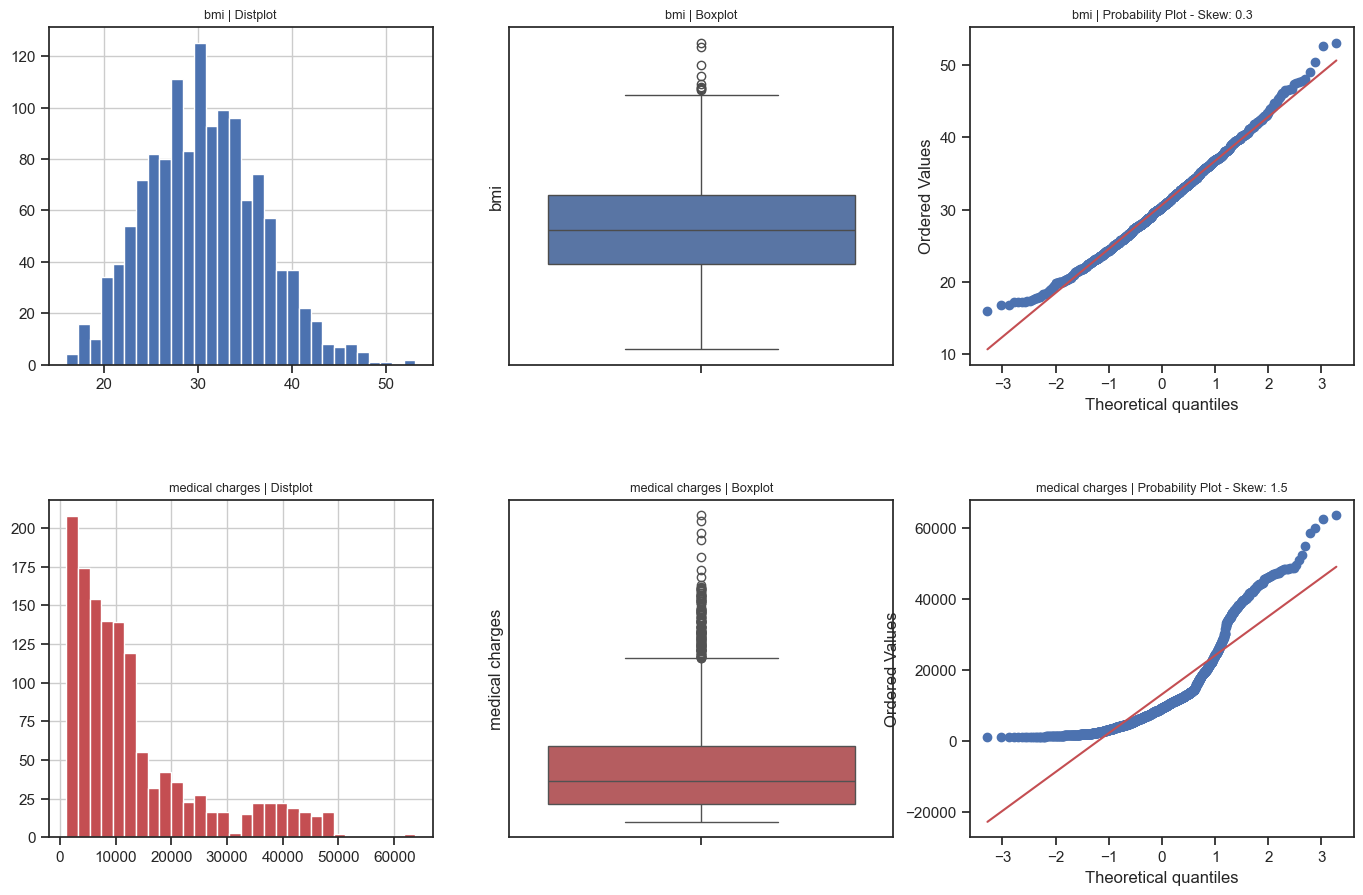

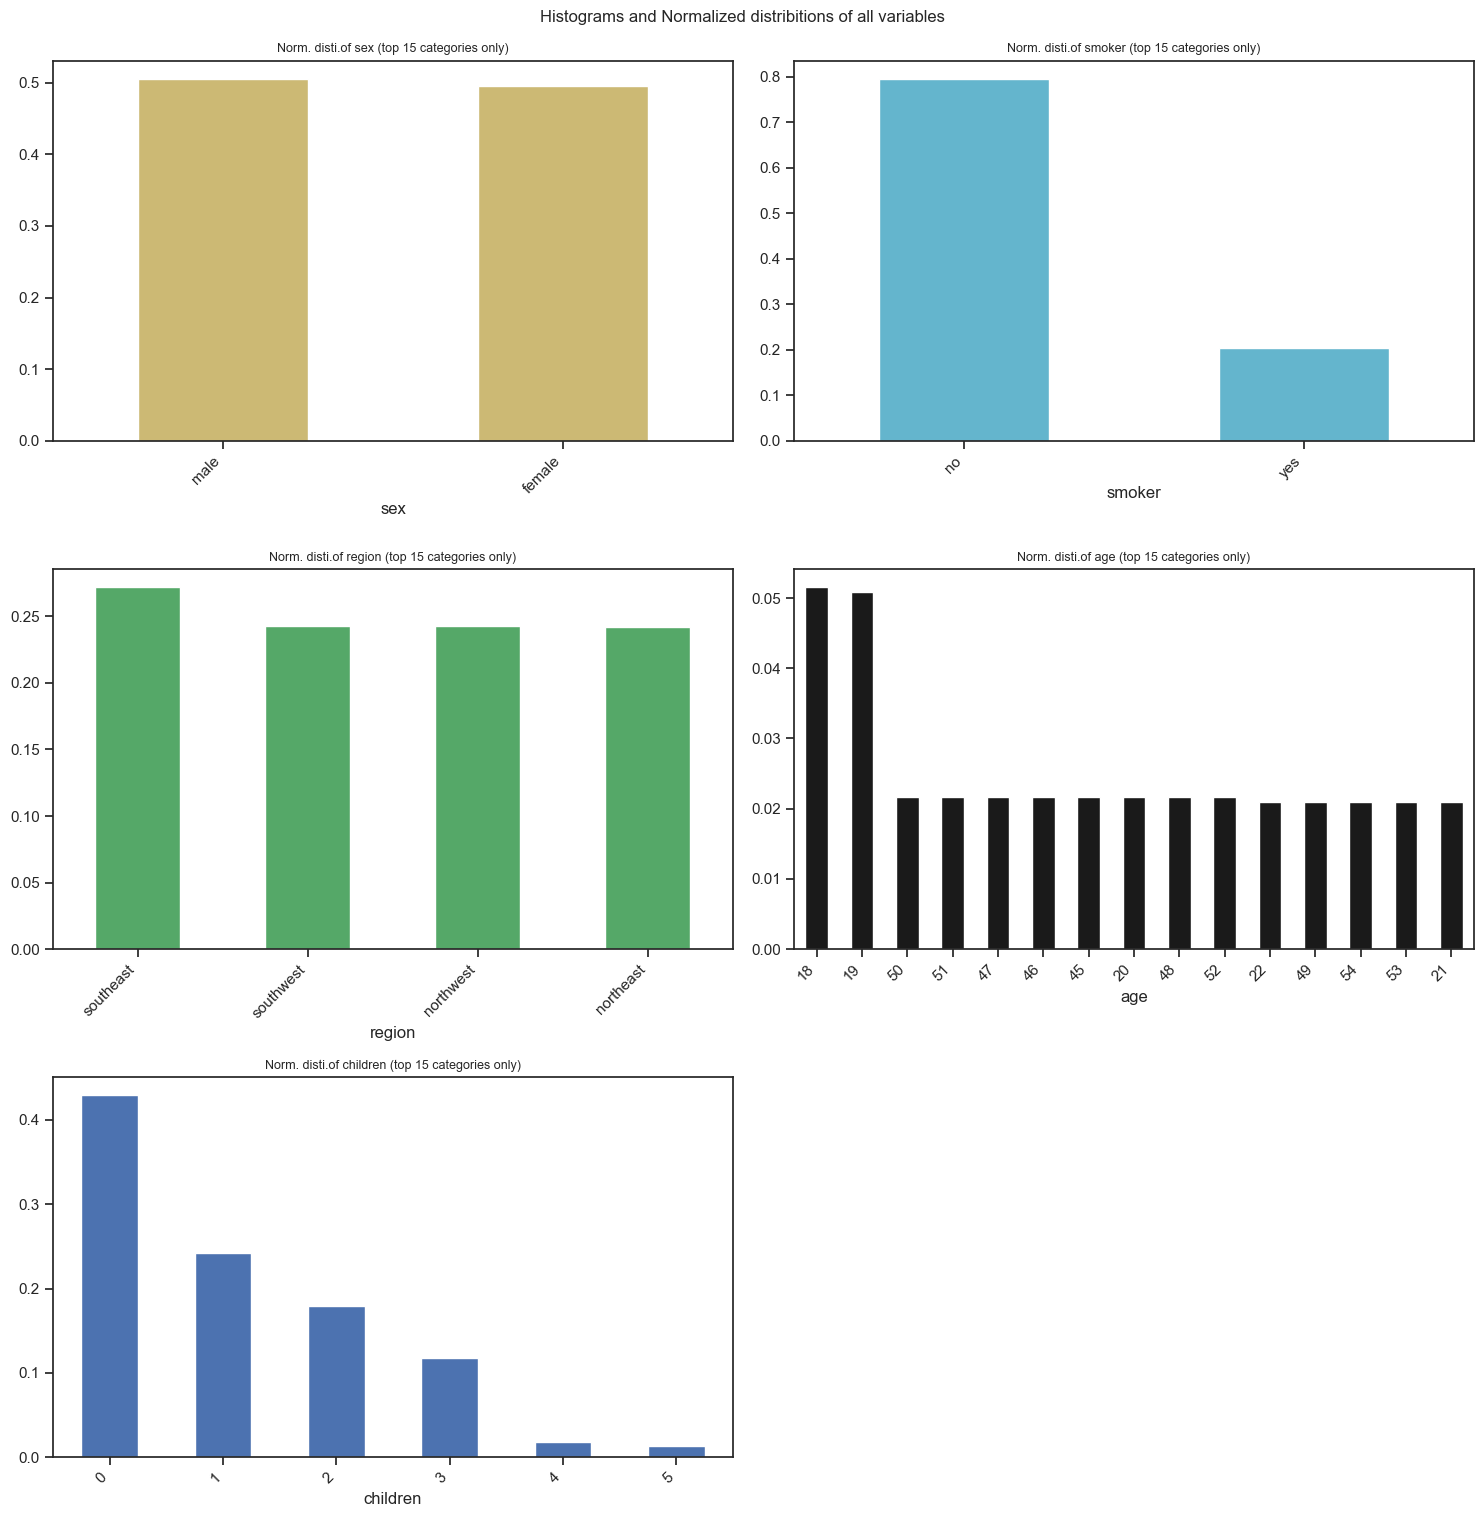

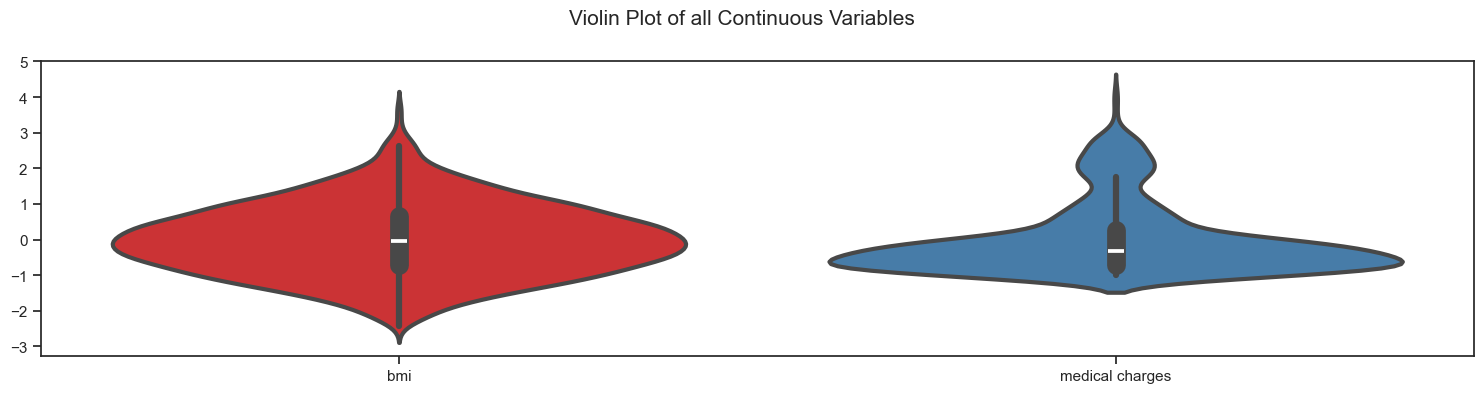

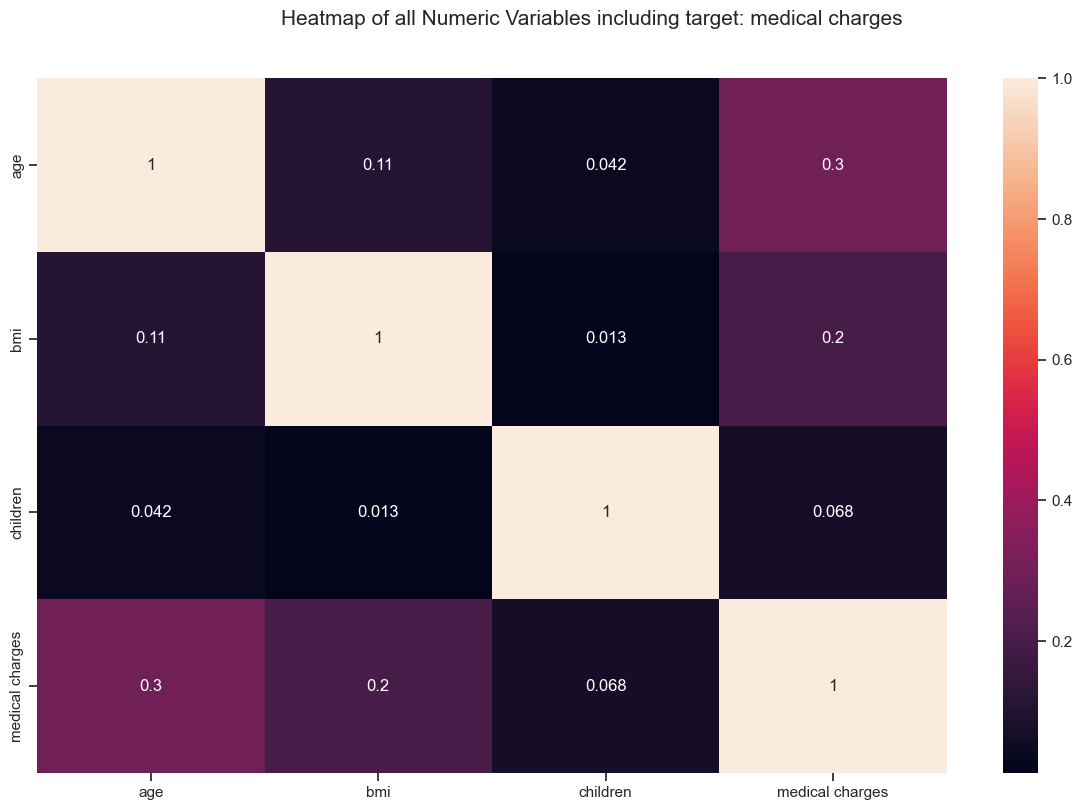

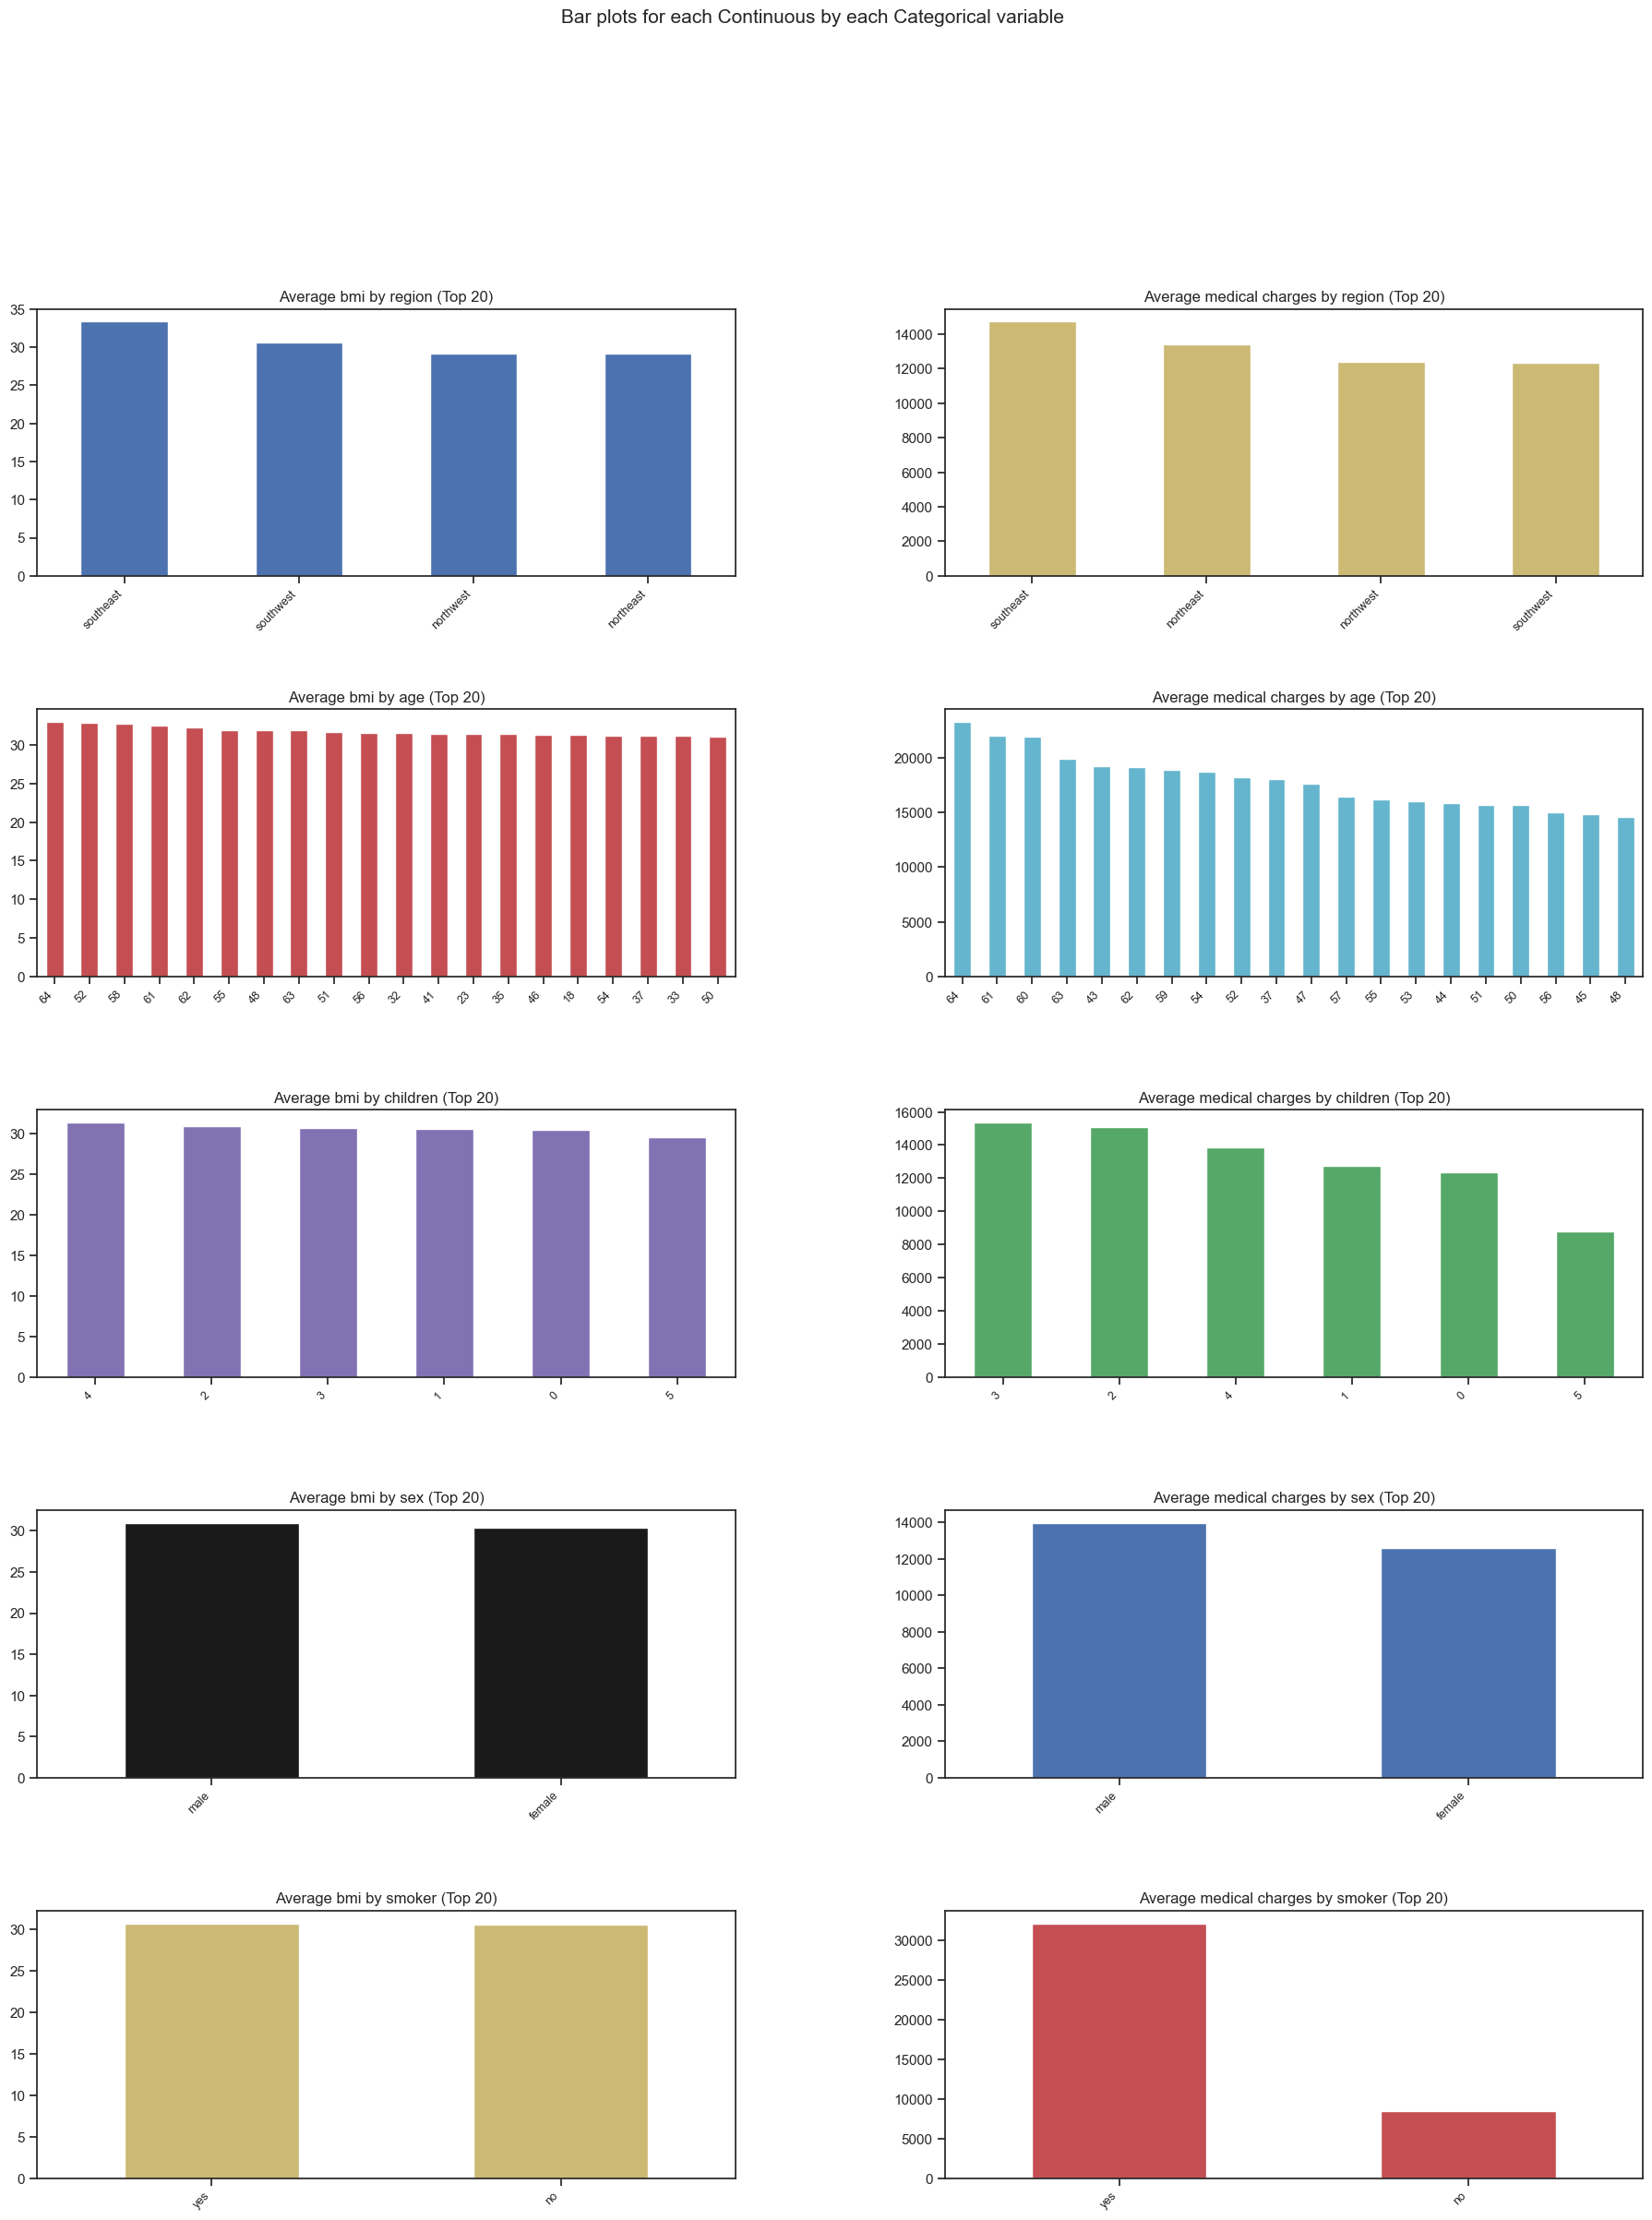

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
      age   sex      bmi   children smoker   region    medical charges
0     19   female  27.900      0      yes   southwest    16884.92400  
1     18     male  33.770      1       no   southeast     1725.55230  
2     28     male  33.000      3       no   southeast     4449.46200  
3     33     male  22.705      0       no   northwest    21984.47061  
4     32     male  28.880      0       no   northwest     3866.85520  
...   ...     ...     ...       ...    ...        ...              ...
1333  50     male  30.970      3       no   northwest    10600.54830  
1334  18   female  31.920      0       no   northeast     2205.98080  
1335  18   female  36.850      0       no   southeast     1629.83350  
1336  21   female  25.800      0       no   southwest     2007.94500  
1337  61   female  29.070      0      yes   northwest    29141.36030  

[1338 rows x 7 colum

In [4]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
#you have to specify the target variable
dft = AV.AutoViz('dataset_.csv', depVar = 'medical charges')
print(dft)

In [5]:
from autoviz import FixDQ
fixdq = FixDQ()
fixdq.fit_transform(data)

Alert: Detecting 1 duplicate rows...
Alert: Dropping 1 duplicate rows can sometimes cause column data types to change to object. Double-check!


,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,9.734236
1,18,male,33.770,1,no,southeast,7.453882
2,28,male,33.000,3,no,southeast,8.400763
3,33,male,22.705,0,no,northwest,9.998137
4,32,male,28.880,0,no,northwest,8.260455
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268755
1334,18,female,31.920,0,no,northeast,7.699381
1335,18,female,36.850,0,no,southeast,7.396847
1336,21,female,25.800,0,no,southwest,7.605365


In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = data.drop('medical charges', axis=1)
y = data['medical charges']

In [7]:
categorical_features = ['sex', 'smoker', 'region']
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', one_hot_encoder, categorical_features)
    ]
)

X_transformed = preprocessor.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

In [11]:
y_pred_bagging = bagging_reg.predict(X_test)

In [12]:
thresholds = [10000, 20000, 30000, 40000, 50000]

y_test_classes_bagging = np.digitize(y_test, bins=thresholds)
y_pred_classes_bagging = np.digitize(y_pred_bagging, bins=thresholds)

category_labels = ['Very Low', 'Low', 'Medium', 'Quite High', 'High', 'Very High']

In [13]:
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score
)

accuracy = accuracy_score(y_test_classes_bagging, y_pred_classes_bagging)
f1 = f1_score(y_test_classes_bagging, y_pred_classes_bagging, average='weighted')
precision = precision_score(y_test_classes_bagging, y_pred_classes_bagging, average='weighted')
recall = recall_score(y_test_classes_bagging, y_pred_classes_bagging, average='weighted')

# Classification Report and Confusion Matrix
class_report = classification_report(y_test_classes_bagging, y_pred_classes_bagging, target_names=category_labels)
conf_matrix = confusion_matrix(y_test_classes_bagging, y_pred_classes_bagging)

# Output results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8059701492537313
F1 Score: 0.8076570584574646
Precision: 0.8315792652152567
Recall: 0.8059701492537313

Classification Report:
               precision    recall  f1-score   support

    Very Low       0.94      0.85      0.89       155
         Low       0.62      0.86      0.72        56
      Medium       0.74      0.58      0.65        24
  Quite High       0.89      0.47      0.62        17
        High       0.70      0.93      0.80        15
   Very High       0.00      0.00      0.00         1

    accuracy                           0.81       268
   macro avg       0.65      0.62      0.61       268
weighted avg       0.83      0.81      0.81       268


Confusion Matrix:
 [[132  23   0   0   0   0]
 [  4  48   4   0   0   0]
 [  5   4  14   1   0   0]
 [  0   3   1   8   5   0]
 [  0   0   0   0  14   1]
 [  0   0   0   0   1   0]]
